In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv(r"C:/Users/whdal/dataset/mixer/mixing_actuator.csv")
data.head()

,Unnamed: 0,Date,Sensor,Quality
0,0,2021-11-18T01:39:59.605000+00:00,0.064453,PASSED
1,1,2021-11-18T01:39:59.605000+00:00,0.240234,PASSED
2,2,2021-11-18T01:39:59.605000+00:00,-0.128906,PASSED
3,3,2021-11-18T01:39:59.605000+00:00,-0.925781,PASSED
4,4,2021-11-18T01:39:59.605000+00:00,-1.037109,PASSED


count    351232.000000
mean         -0.108910
std           2.563446
min          -9.023438
25%          -1.992188
50%          -0.140625
75%           1.843750
max           9.203906
Name: Sensor, dtype: float64


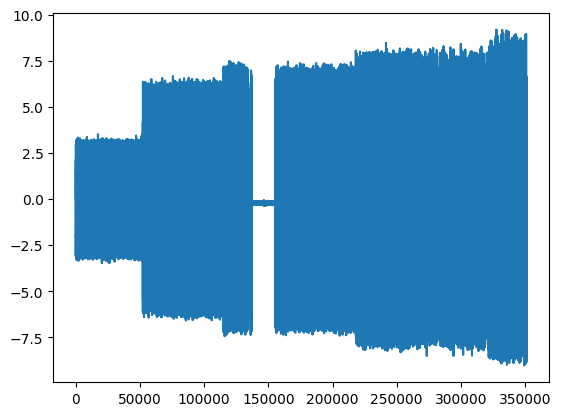

In [58]:
print(data['Sensor'].describe())
plt.plot(data['Sensor'])

In [59]:
data['Quality'].value_counts()

Quality
PASSED    191008
FAILED    160224
Name: count, dtype: int64

In [60]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Date,Sensor,Quality
0,2021-11-18T01:39:59.605000+00:00,0.064453,PASSED
1,2021-11-18T01:39:59.605000+00:00,0.240234,PASSED
2,2021-11-18T01:39:59.605000+00:00,-0.128906,PASSED
3,2021-11-18T01:39:59.605000+00:00,-0.925781,PASSED
4,2021-11-18T01:39:59.605000+00:00,-1.037109,PASSED


In [61]:
sec = []

sec_num = 0

for i in range(len(data)):
    sec_num += 1
    sec.append(sec_num)
    
    if sec_num == 1024: sec_num = 0
    else: sec_num = sec_num

In [62]:
data['sec'] = sec
data

,Date,Sensor,Quality,sec
0,2021-11-18T01:39:59.605000+00:00,0.064453,PASSED,1
1,2021-11-18T01:39:59.605000+00:00,0.240234,PASSED,2
2,2021-11-18T01:39:59.605000+00:00,-0.128906,PASSED,3
3,2021-11-18T01:39:59.605000+00:00,-0.925781,PASSED,4
4,2021-11-18T01:39:59.605000+00:00,-1.037109,PASSED,5
...,...,...,...,...
351227,2021-11-20T07:48:34.533000+00:00,0.262500,PASSED,1020
351228,2021-11-20T07:48:34.533000+00:00,0.273438,PASSED,1021
351229,2021-11-20T07:48:34.533000+00:00,1.796875,PASSED,1022
351230,2021-11-20T07:48:34.533000+00:00,2.406250,FAILED,1023


In [63]:
import numpy as np
from sklearn.model_selection import train_test_split

In [64]:
X = data['sec']
y = data['Sensor']

In [65]:
# 시간의 흐름에 따라 추출되는 데이터에 대해 유연하게 불량 여부 판정이므로 shuffle X
X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size=0.2, random_state=0, shuffle=False)

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)



In [66]:
X_test

array([[ 410],
       [ 411],
       [ 412],
       ...,
       [1022],
       [1023],
       [1024]], dtype=int64)

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error


In [68]:
rmse_val = []

for K in range(17):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print(f'RMSE value for k = {K} is {error}')

RMSE value for k = 1 is 3.155654543139498
RMSE value for k = 2 is 2.7940511832357706
RMSE value for k = 3 is 2.7189076961300462
RMSE value for k = 4 is 2.6320664649038235
RMSE value for k = 5 is 2.6424135191562894
RMSE value for k = 6 is 2.6619964616940703
RMSE value for k = 7 is 2.6087162196247706
RMSE value for k = 8 is 2.61889414958276
RMSE value for k = 9 is 2.6058137842309006
RMSE value for k = 10 is 2.5780566469224624
RMSE value for k = 11 is 2.5777371983399378
RMSE value for k = 12 is 2.5765581184601403
RMSE value for k = 13 is 2.553720719255234
RMSE value for k = 14 is 2.5601407984724442
RMSE value for k = 15 is 2.5675579570136913
RMSE value for k = 16 is 2.5510966581338117
RMSE value for k = 17 is 2.5524771658531944


<Axes: >

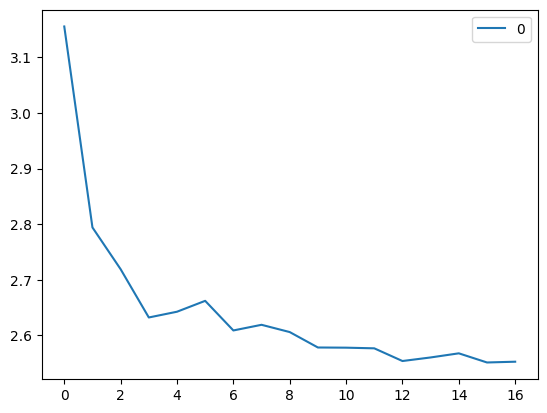

In [69]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [70]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [71]:
line = np.linspace(1, 1024, 1024).reshape(-1, 1)

reg = KNeighborsRegressor(n_neighbors=17, weights='distance')
reg.fit(X_train, y_train)
standard = reg.predict(line)
print(standard)
print(len(standard))

[ 0.00379136 -0.00654871  0.03963695 ...  0.36465993  0.22587316
  0.37706801]
1024


In [72]:
sigma = np.std(standard)
sigma

0.4864397799297683

In [73]:
min_standard = standard - 3*sigma
max_standard = standard + 3*sigma

In [74]:
min_standard_list = []
j = 0

for i in range(len(y_test)):
    min_standard_list.append(min_standard[j])
    j += 1
    if j == len(min_standard):
        j = 0

In [75]:
max_standard_list = []
j = 0

for i in range(len(y_test)):
    max_standard_list.append(max_standard[j])
    j += 1
    if j == len(max_standard):
        j = 0

In [76]:
standard_list = []

j=0
for i in range(len(y_test)):
    standard_list.append(standard[j])
    j += 1
    if j == len(standard):
        j = 0

In [77]:
df = pd.DataFrame({'real_y':y_test, 'standard':standard_list,
                   'min_standard':min_standard_list, 'max_standard':max_standard_list})
df

,real_y,standard,min_standard,max_standard
0,0.638281,0.003791,-1.455528,1.463111
1,-0.519531,-0.006549,-1.465868,1.452771
2,0.519531,0.039637,-1.419682,1.498956
3,0.207813,-0.231273,-1.690592,1.228046
4,-2.404688,-0.370519,-1.829839,1.088800
...,...,...,...,...
70242,0.262500,0.609375,-0.849944,2.068694
70243,0.273438,0.406365,-1.052954,1.865684
70244,1.796875,0.485983,-0.973336,1.945303
70245,2.406250,0.097541,-1.361778,1.556861


In [80]:
pred_fault = []
for i in range(len(df)):
    if df['real_y'][i] >= df['max_standard'][i] or df['real_y'][i] <= df['min_standard'][i]: 
        pred_fault.append(1)
    else: pred_fault.append(0)
    

In [81]:
real_fault = []
for i in range(len(df)):
    if data['Quality'][280985+i] == "FAILED":
        real_fault.append(1)
    else:
        real_fault.append(0)
        

In [82]:
df['pred_fault'] = pred_fault
df['real_fault'] = real_fault


In [86]:
from sklearn.metrics import accuracy_score, precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report

import seaborn as sns
sns.set(font_scale=2)

SyntaxError: trailing comma not allowed without surrounding parentheses (1644820208.py, line 1)